In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.shape

(500, 8)

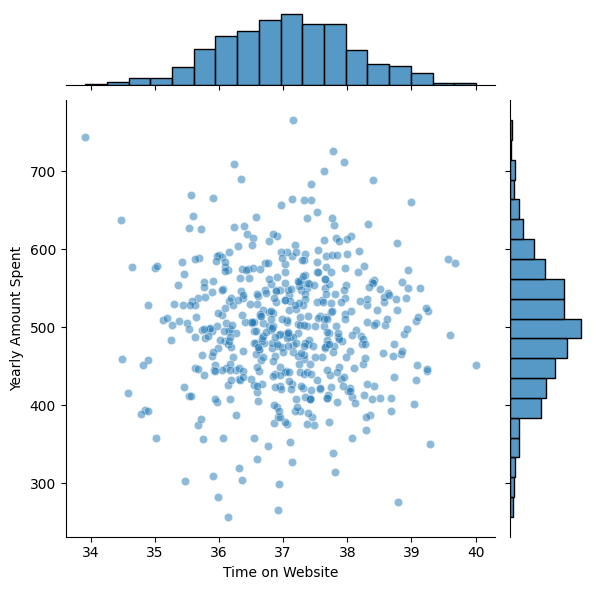

In [8]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent',data = df, alpha = 0.5)

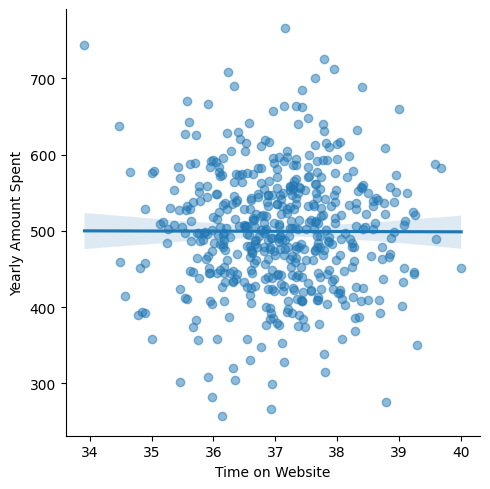

In [13]:
sns.lmplot(x='Time on Website', y = 'Yearly Amount Spent',data = df, scatter_kws = {'alpha' :0.5})

In [14]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.iloc[:,3:7]
y = df.iloc[:,-1]


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
# traing the model
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
x= model.coef_

In [31]:
cdf = pd.DataFrame(x,X.columns,columns =['coef'])
cdf
# higher the coef, more imp the variable

,coef
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


In [34]:
prediction = model.predict(X_test)

Text(0.5, 1.0, 'evaluation of LM model')

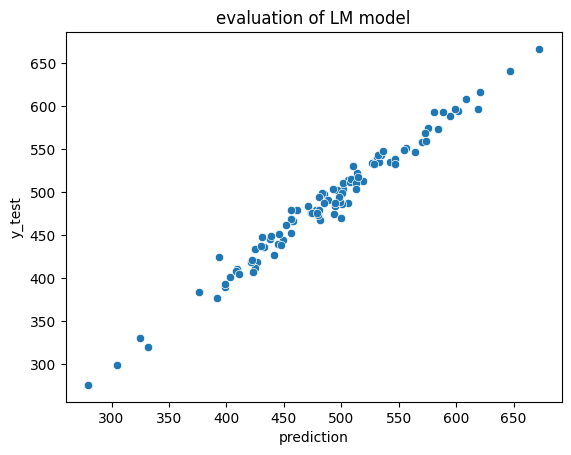

In [38]:
sns.scatterplot(x=prediction,y=y_test)
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.title('evaluation of LM model')

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [42]:
print("mean square error : ", mean_squared_error(y_test,prediction))
print("mean absolute error : ", mean_absolute_error(y_test,prediction))
print("RMSE :", math.sqrt(mean_squared_error(y_test,prediction)))

mean square error :  109.8637411839399
mean absolute error :  8.558441885315231
RMSE : 10.48159058463647


In [44]:
residual = y_test - prediction
residual

,Yearly Amount Spent
361,-1.829165
73,-7.756069
374,-8.017377
155,2.064515
104,0.402956
...,...
347,4.827772
86,2.197933
75,22.788656
438,-5.685951


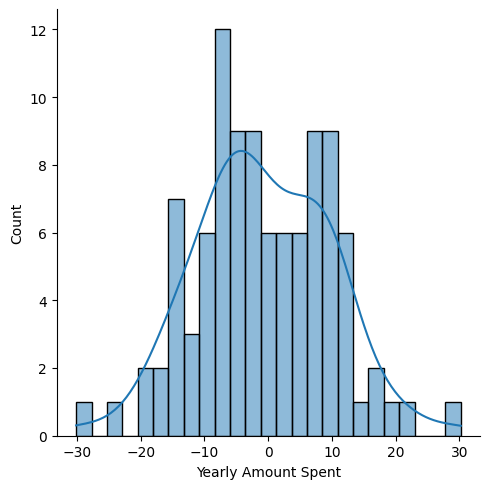

In [46]:
sns.displot(residual,bins=25,kde=True)

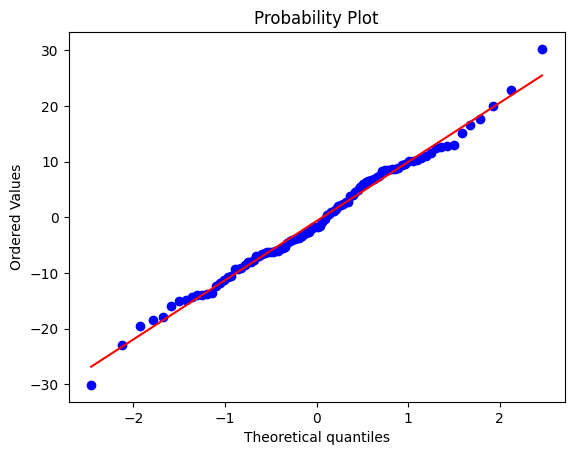

In [47]:
import pylab
import scipy.stats as stats

stats.probplot(residual,dist='norm',plot=pylab)
pylab.show()